# Regression

In [15]:
import numpy as np
import matplotlib as plt
import sklearn
import random
import pandas as pd
import seaborn as sns

### Simple data generation

In [34]:
X = np.linspace(0, 20.1, 200)
Y = X + 10

In [35]:
# Add some noise
Y = Y + np.random.normal(loc=0, scale=0.5, size=Y.shape[0])

<Axes: >

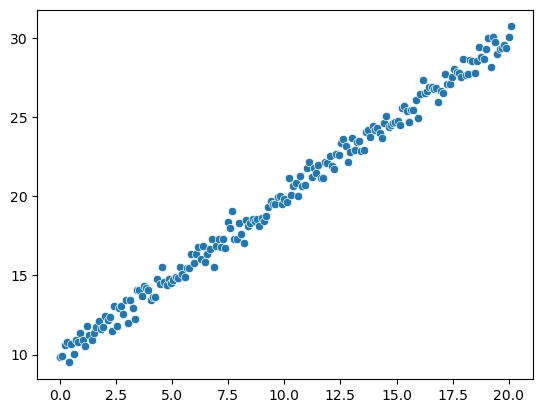

In [36]:
sns.scatterplot(x=X, y=Y)

### LinearRegression

#### 1. Analytical solution. Linear  dependence

In [47]:
from sklearn.model_selection import train_test_split

In [68]:
X_0 = np.stack((np.ones(200),X), axis=1)

In [69]:
X_0.shape

(200, 2)

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_0, Y, test_size=0.2, random_state=42)

In [107]:
class LinearRegression:
    def __init__(self,):
        self.w = None    
    def get_analytical_solution(self, X, Y):
        self.w = np.linalg.inv(X.T@ X) @ X.T @ Y
    
    def makePrediction(self, X):
        return self.w @ X.T 
    

In [108]:
regressor = LinearRegression()
regressor.get_analytical_solution(X_train, Y_train)

In [109]:
Y_pred = regressor.makePrediction(X_test)
Y_pred.shape

(40,)

In [105]:
def calculate_MSE_error(Y_true, Y_pred):
    return np.sum((Y_true - Y_pred) ** 2)

<Axes: >

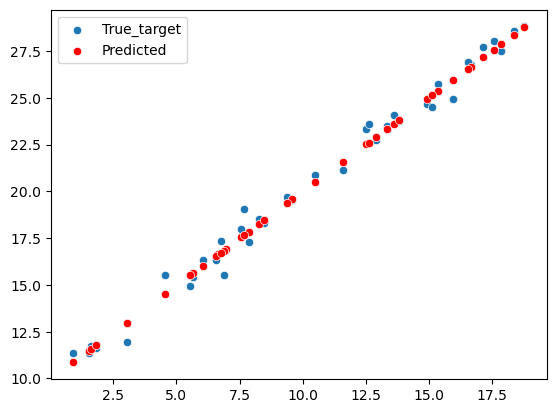

In [119]:
sns.scatterplot(x=X_test[:,1], y=Y_test, label='True_target')
sns.scatterplot(x=X_test[:,1], y=Y_pred, color='red', label='Predicted')

In [120]:
calculate_MSE_error(Y_pred, Y_test)

np.float64(12.590853911414587)

#### 1. Analytical solution. Nonlinear  dependence

In [121]:
X = np.linspace(0, 20.1, 200)
Y = np.exp(X) 